# Lab 8: Disease Spread Modelling and Visualising Covid-19 Data

# <span style="color:blue"> In this lab session, you will learn about:</span>
- ### mathematical modelling of disease spread
- ### the SIR model
- ### the SEIR model
- ### visualising Covid-19 data using Pandas

## Mathematical Modelling of Disease Spread
An infectious disease can be modelled mathematically in order to describe or study its behaviour. The aim of the modelling is to project how the infectious disease will progress with time and if the likely outcome turns out to be epidemic, to what extent will this happen? This will help inform and implement any necessary [public health interventions](https://www.straitstimes.com/singapore/health/trust-a-most-precious-resource-critical-in-singapores-covid-19-response-pm-lee) before the spread becomes uncontrollable.

Models work with basic assumptions and collected data and together with the mathematics, epidemiological parameters such as the reproductive number could be computed for the specific disease type. The effectiveness of different interventions such as social distancing or mass vaccination programmes (as seen in the current Covid-19 pandemic) could then be measured when the modelling is modified based on such interventions and with new data collected. 

In summary, the [modelling](https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease) of infectious diseases is a tool that has been used to study the mechanisms by which diseases spread, to predict the future course of an outbreak and to evaluate strategies to control an epidemic.

## The SIR Model
[Compartmental models](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) such as SIR or SEIR are general modelling technique for studying infectious diseases. The population is assigned to compartments with labels (for example, S, E, I, R denotes Susceptible, Exposed, Infectious, Recovered respectively) where the order of the labels denotes the flow pattern of how the disease spread proceeds). People may progress between compartments.

In the SIR model, there are three compartments in a fixed population:

- $S(t)$ (susceptible) represents individuals of the population not yet infected with the disease at time $t$, or those susceptible in the population.
- $I(t)$ (infectious) represents individuals of the population who have been infected with the disease and are capable of infecting others in the susceptible group.
- $R(t)$ (recovered) represents individuals of the population who have been infected and then protected against the disease, either due to immunity or death*. They will not be infected again or are not capable of infecting others.

*Assumed to be negligible with respect to the total population. In fact demography (births and deaths) is to be omiited in the consideration of this simple compartmental model.

The normalised SIR formulation consists of the following set of coupled ordinary differential equations: 

$$ \frac{dS'}{dt} = -rR_{0}S'I' $$ 
$$ \frac{dI'}{dt} = rI'(R_{0}S'-1) $$ 
$$ \frac{dR'}{dt} = rI' $$ 

$r$ is the rate of recovery and $R_{0}$ is the basic reproductive ratio or number and is dependent on the parameter for infectivity ($R_{0} = \dfrac{\beta N}{r}$ where $N$ is the total population assumed to be a constant). 

**Advantageous of this formulation:**
- All equations are proportional to $r$, which graphically does not affect the qualitative behaviour of the system other than to rescale the timescale. Therefore, to understand the qualitative behavior, we can simply set $r=1$.
- Hence there is only one adjustable parameter left, namely $R_0$. It controls the qualitative behavior of the epidemic outbreak.

The set of differential equations can be solved in Python by calling the **odeint()** function.

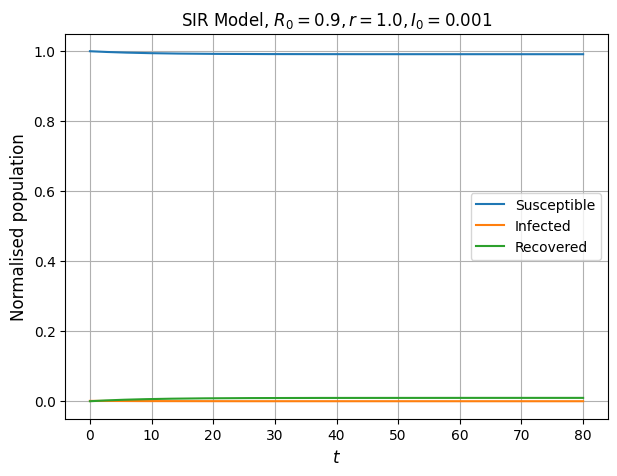

In [1]:
# Modeling SIR with R0 = 0.9

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the model function 
def model(U, t):
    s, i = U[0], U[1]
    dSdt = -r*R0*s*i
    dIdt = r*i*(R0*s-1)
    return [dSdt, dIdt]
    # return [ -r*R0*U[0]*U[1], r*U[1]*(R0*U[0]-1) ]   # One line of code to return [dSdt, dIdt]

tmax = 80
ticks = 50*tmax   # Further division of t interval
t = np.linspace(0, tmax, ticks)

r = 1.0    # Rate of recovery 
R0 = 0.9   # Basic reproductive ratio
U0 = [0.999, 0.001]   # Initial conditions; choose a very small infected fraction

Uns = odeint(model, U0, t)

S = Uns[:,0]   # Extract the first column of data from Uns which contains the solutions for S
I = Uns[:,1]   # Extract the second column of data from Uns which contains the solutions for I
R = 1-S-I      # Remember S + I + R = 1
    
plt.figure(figsize=(7,5))
plt.plot(t,S,label='Susceptible')
plt.plot(t,I,label='Infected')
plt.plot(t,R,label='Recovered')
plt.title(f"SIR Model, $R_0 = {R0}, r = {r}, I_0 = {U0[1]}$")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("Normalised population", fontsize=12) 
plt.legend()
plt.grid()
plt.show()

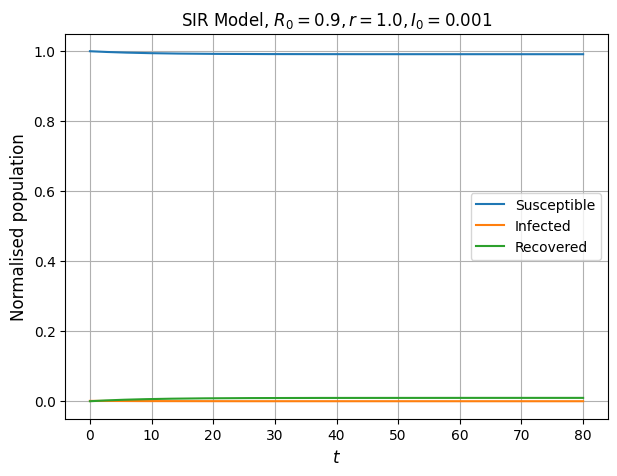

In [2]:
# Modeling SIR with R0 = 0.9; solving for all three populations simultaneously using odeint()

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the model function 
def model(U, t):
    s, i = U[0], U[1]
    dSdt = -r*R0*s*i
    dIdt = r*i*(R0*s-1)
    dRdt = r*i
    return [dSdt, dIdt, dRdt]
    # return [ -r*R0*U[0]*U[1], r*U[1]*(R0*U[0]-1), r*U[1]]   # One line of code to return [dSdt, dIdt]

tmax = 80
ticks = 50*tmax   # Further division of t interval
t = np.linspace(0, tmax, ticks)

r = 1.0    # Rate of recovery 
R0 = 0.9   # Basic reproductive ratio
U0 = [0.999, 0.001, 0]   # Note that the size of initial values must match the size of array returned by model function

Uns = odeint(model, U0, t)

S = Uns[:,0]   # Extract the first column of data from Uns which contains the solutions for S
I = Uns[:,1]   # Extract the second column of data from Uns which contains the solutions for I
R = Uns[:,2]   # Extract the third column of data from Uns which contains the solutions for R
    
plt.figure(figsize=(7,5))
plt.plot(t,S,label='Susceptible')
plt.plot(t,I,label='Infected')
plt.plot(t,R,label='Recovered')
plt.title(f"SIR Model, $R_0 = {R0}, r = {r}, I_0 = {U0[1]}$")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("Normalised population", fontsize=12) 
plt.legend()
plt.grid()
plt.show()

### Herd Immunity
Herd immunity occurs when a large portion of a community (the herd) becomes immune to a disease. When herd immunity is achieved, the spread slows down or the infection rate decreases. Consequently, there is protection for the whole community including newborns and those whose immune systems are compromised. Mathematically, for infection rate to decline, 

$$ \frac{dI'}{dt} < 0 $$ 
which means $$ R_{0}S'-1 < 0 $$
$$ S' < \frac{1}{R_{0}} $$
Recall that $S' + I'+ R'= 1$ and $H' = I'+ R'$, therefore
$$ 1-H' < \frac{1}{R_{0}} $$
$$ H' > 1-\frac{1}{R_{0}} $$

For R0 = 1.5, maxI = 0.0637, recovered population = 0.2696
Theoretical herd immunity: 0.3333
Numerical herd immunity: 0.3333

For R0 = 2.0, maxI = 0.1539, recovered population = 0.3475
Theoretical herd immunity: 0.5000
Numerical herd immunity: 0.5015

For R0 = 2.5, maxI = 0.2339, recovered population = 0.3644
Theoretical herd immunity: 0.6000
Numerical herd immunity: 0.5982

For R0 = 3.0, maxI = 0.3008, recovered population = 0.3684
Theoretical herd immunity: 0.6667
Numerical herd immunity: 0.6692



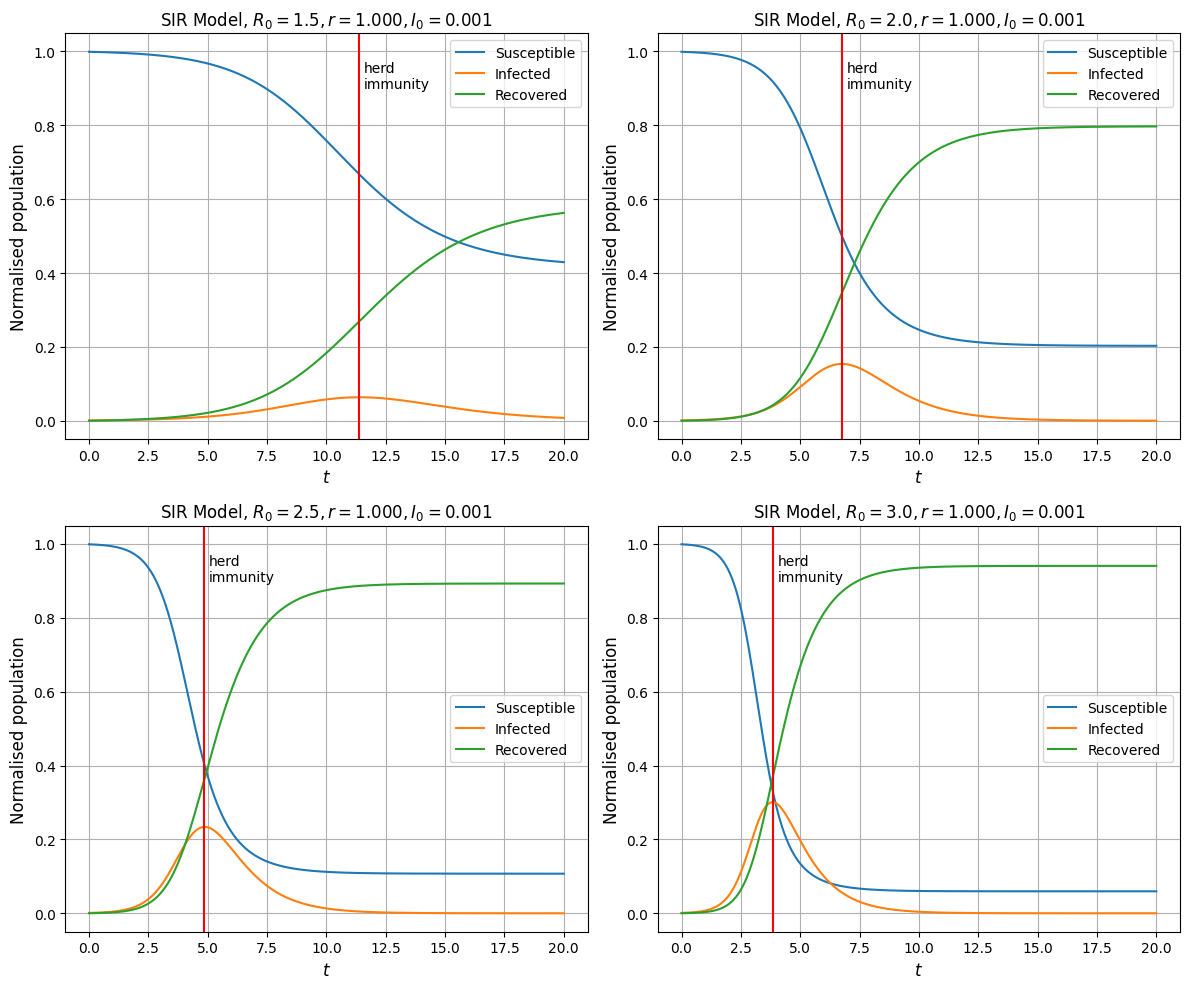

In [3]:
# Modeling SIR with R0 = 1.5, 2.0, 2.5 & 3.0 and computing the herd immunity

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the model function 
def model(U, t, Rt):
    s, i = U[0], U[1]
    R0 = Rt
    dSdt = -r*R0*s*i
    dIdt = r*i*(R0*s-1)
    return [dSdt, dIdt]
    # return [ -r*R0*U[0]*U[1], r*U[1]*(R0*U[0]-1) ]   # One line of code to return [dSdt, dIdt]

# tmax and r values influence spread of curves but will not affect populations    
tmax = 20   # Try 30, 40, 50
ticks = 50*tmax   # Further division of t interval
t = np.linspace(0, tmax, ticks)

r = 1/1   # Slower recovery rate implies disease spread will play out longer; try 1/2; 1/5; 1/7
R0 = [1.5, 2.0, 2.5, 3.0]   # List of reproductive ratios
U0 = [0.999, 0.001]   # Initial conditions; choose a very small infected fraction

i = 1
plt.figure(figsize=(12,10))
for Rt in R0:
    plt.subplot(2,2,i)
    Uns = odeint(model, U0, t, args=(Rt,))
    S = Uns[:,0]
    I = Uns[:,1]
    R = 1-S-I
        
    # Compute herd immunity
    maxI = np.max(I)       # To retrieve max infected population
    index = np.argmax(I)   # To retrieve index that corresponds to where maxI is
    herdR = R[index]       # Recovered population that corresponds to maxI
    print(f"For R0 = {Rt}, maxI = {maxI:.4f}, recovered population = {herdR:.4f}")
    print(f"Theoretical herd immunity: {1-1/Rt:.4f}")
    print(f"Numerical herd immunity: {maxI + herdR:.4f}\n")
       
    # Plot graphs
    plt.plot(t,S,label='Susceptible')
    plt.plot(t,I,label='Infected')
    plt.plot(t,R,label='Recovered')
    plt.axvline(x = t[index], color = 'r')   # Draw vertical line where x = t with t corresonding to maxI
    plt.text(t[index]+10*tmax/ticks,0.9,"herd\nimmunity")   # Set text label next to vert line; x is offset by 10*tmax/ticks
                                                           # Make sure label does not block any graphs
    plt.title(f"SIR Model, $R_0 = {Rt}, r = {r:.3f}, I_0 = {U0[1]}$")   # corresponding to maxI
    plt.xlabel("$t$", fontsize=12)
    plt.ylabel("Normalised population", fontsize=12) 
    plt.legend()
    plt.grid()    
    i += 1

plt.tight_layout() 
plt.show()

## The SEIR Model
In the SEIR model, there are four compartments in a fixed population:

- $S(t)$ (susceptible) represents individuals of the population not yet infected with the disease at time $t$, or those susceptible in the population.
- $E(t)$ (exposed) represents individuals of the population who have been exposed to the disease but are not yet infectious due to an [incubation](https://en.wikipedia.org/wiki/Incubation_period) period.
- $I(t)$ (infectious) represents individuals of the population who have been infected with the disease and are capable of infecting others in the susceptible group.
- $R(t)$ represents individuals of the population who have been infected and then protected against the disease, either due to immunity or death*. They will not be infected again or are not capable of infecting others.

*Assumed to be negligible with respect to the total population. Again demography (births and deaths) is to be omiited in the consideration of this simple compartmental model.

The normalised SEIR formulation consists of the following set of coupled ordinary differential equations: 

$$ \frac{dS'}{dt} = -rR_{0}S'I' $$ 
$$ \frac{dE'}{dt} = rR_{0}S'I'-eE' $$
$$ \frac{dI'}{dt} = eE'-rI' $$ 
$$ \frac{dR'}{dt} = rI' $$ 

$e$ is the rate at which exposed individuals become infectious, $r$ is the rate of recovery and $R_{0}$ is the basic reproductive ratio or number and is dependent on the parameter for infectivity ($R_{0} = \dfrac{\beta N}{r}$ where $N$ is the total population assumed to be a constant). 

The set of differential equations can be solved in Python by calling the **odeint()** function.

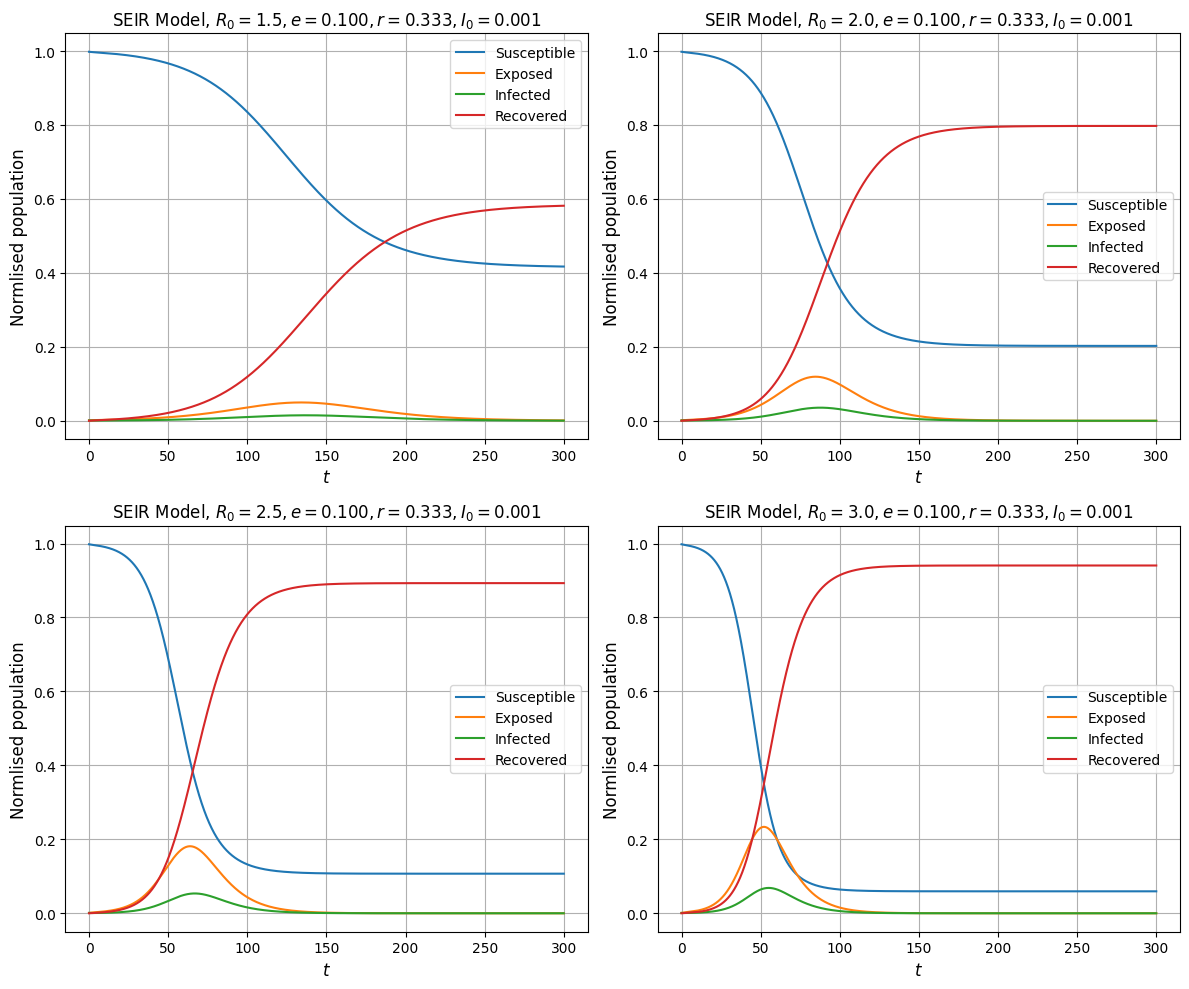

In [4]:
# Modeling SEIR with R0 = 1.5, 2.0, 2.5 & 3.0

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the model function 
def model(U, t, Rt):
    s, E, i = U[0], U[1], U[2]
    R0 = Rt
    dSdt = -r*R0*s*i
    dEdt = r*R0*s*i-e*E
    dIdt = e*E-r*i
    dRdt = r*i
    return [dSdt, dEdt, dIdt, dRdt]
    
tmax = 300   # Try 150, 200
ticks = 50*tmax   # Further division of t interval
t = np.linspace(0, tmax, ticks)

e = 1/10   # Slower rate of becoming infectious implies longer incubation period; try 1/5; 1/10
r = 1/3   # Slower recovery rate implies disease spread will play out longer; try 1/2; 1/5; 1/7
R0 = [1.5, 2.0, 2.5, 3.0]   # List of reproductive ratios
U0 = [0.998, 0.001, 0.001, 0]    # The size of initial values must match the size of array returned by model function

i = 1
plt.figure(figsize=(12,10))
for Rt in R0:
    plt.subplot(2,2,i)
    Uns = odeint(model, U0, t, args=(Rt,))
    S = Uns[:,0]
    E = Uns[:,1]
    I = Uns[:,2]
    R = Uns[:,3]
    plt.plot(t,S,label='Susceptible')
    plt.plot(t,E,label='Exposed')
    plt.plot(t,I,label='Infected')
    plt.plot(t,R,label='Recovered')
    plt.title(f"SEIR Model, $R_0 = {Rt}, e = {e:.3f}, r = {r:.3f}, I_0 = {U0[2]}$")
    plt.xlabel("$t$", fontsize=12)
    plt.ylabel("Normlised population", fontsize=12) 
    plt.legend()
    plt.grid()
    i += 1

plt.tight_layout()
plt.show()

## Visualising Covid-19 Data using Pandas
Instead of working with simulated epidemic data, we can import and visualise real epidemic data using Pandas. We will use Our World in Data's [Covid-19 dataset](https://github.com/owid/covid-19-data/tree/master/public/data) and perform some basic trend analysis with it. The data are found in the file 'Covid.csv' and should be saved in the same folder as this notebook so as to be loaded by the following code without any modification. For statistics on Covid-19 from local source, click [here]( https://www.moh.gov.sg/covid-19/statistics). 

We will pay special attention to the infection, death, vaccination, reproduction ($R_0$) and hospitalisation rates. The following are questions for you to ponder about: 

- How do the surges resemble the SIR model results?
- What are the initial conditions?
- What causes the large discrepancy between different countries?
- How do health protocols vary relative to the pandemic trends?
- How is the reproduction rate $R_0$ in the SIR model different from the $r$ in the logistic map?

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
178824,SGP,Asia,Singapore,2021-08-02,65213.0,111.0,128.429,38.0,1.0,0.143,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
178825,SGP,Asia,Singapore,2021-08-03,65315.0,102.0,123.143,38.0,0.0,0.143,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
178826,SGP,Asia,Singapore,2021-08-04,65410.0,95.0,117.286,39.0,1.0,0.286,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
178827,SGP,Asia,Singapore,2021-08-05,65508.0,98.0,112.286,40.0,1.0,0.429,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
178828,SGP,Asia,Singapore,2021-08-06,65605.0,97.0,106.286,41.0,1.0,0.571,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178971,SGP,Asia,Singapore,2021-12-27,278044.0,280.0,277.000,825.0,3.0,1.429,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
178972,SGP,Asia,Singapore,2021-12-28,278409.0,365.0,289.143,825.0,0.0,1.143,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
178973,SGP,Asia,Singapore,2021-12-29,278750.0,341.0,290.000,826.0,1.0,1.143,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
178974,SGP,Asia,Singapore,2021-12-30,279061.0,311.0,288.429,827.0,1.0,1.000,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN


Highest caseload of 5324 (per million) occurs on 2021-10-27


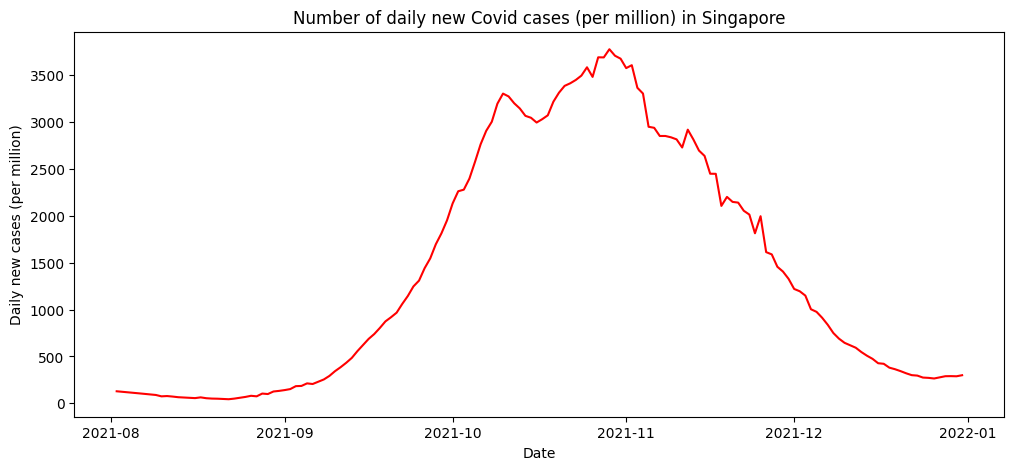

In [6]:
# Visualisation of SG Covid data during the Delta virus spread

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Covid.csv')   # Return a dataframe from the csv file
df['date'] = pd.to_datetime(df['date'])  # Convert the 'Date' column data in dataframe into a Python date time object
                                         # so that date labels will appear properly in plot
dfSG = df[(df['iso_code'] == 'SGP') & (df['date']>'2021-08-01') & (df['date']<'2022-01-01')]   # Set conditions 
display(dfSG)   # For a nicer display of data records
SG = pd.DataFrame(dfSG).to_numpy()   # Prepare for numeric plotting

maxCase = np.max(SG[:,5])    # Retrieve max infected population
index = np.argmax(SG[:,5])   # Retrieve row index that corresponds to where maxCase is
date = SG[index,3]           # Retrieve date that corresponds to maxCase
print(f"Highest caseload of {maxCase:.0f} (per million) occurs on {date.date()}")   # .date() extracts date without time

"""
# Another way of coding above via dataframe
maxCase = dfSG['new_cases'].max()    # Retrieve max infected population
index = dfSG['new_cases'].idxmax()   # Retrieve row index that corresponds to where maxCase is
date = dfSG['date']                  # Retrieve date column data
print(f"Highest caseload of {maxCase:.0f} (per million) occurs on {date[index].date()}")   # .date() extracts date w/o time
"""

# Plot Singapore's COVID data
plt.figure(figsize=(12,5))
#plt.plot(SG[:,3],SG[:,5],"r")   # 4th field is date; 6th field is daily new cases
plt.plot(SG[:,3],SG[:,6],"r")   # 4th field is date; 7th field is daily new cases (smoothed)
plt.title("Number of daily new Covid cases (per million) in Singapore")
plt.ylabel("Daily new cases (per million)"); plt.xlabel("Date")
plt.show()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221906,ZWE,Africa,Zimbabwe,2022-10-02,257517.0,52.0,25.286,5602.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
221907,ZWE,Africa,Zimbabwe,2022-10-03,257538.0,21.0,28.000,5603.0,1.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
221908,ZWE,Africa,Zimbabwe,2022-10-04,257568.0,30.0,27.429,5603.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
221909,ZWE,Africa,Zimbabwe,2022-10-05,257568.0,0.0,22.714,5603.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


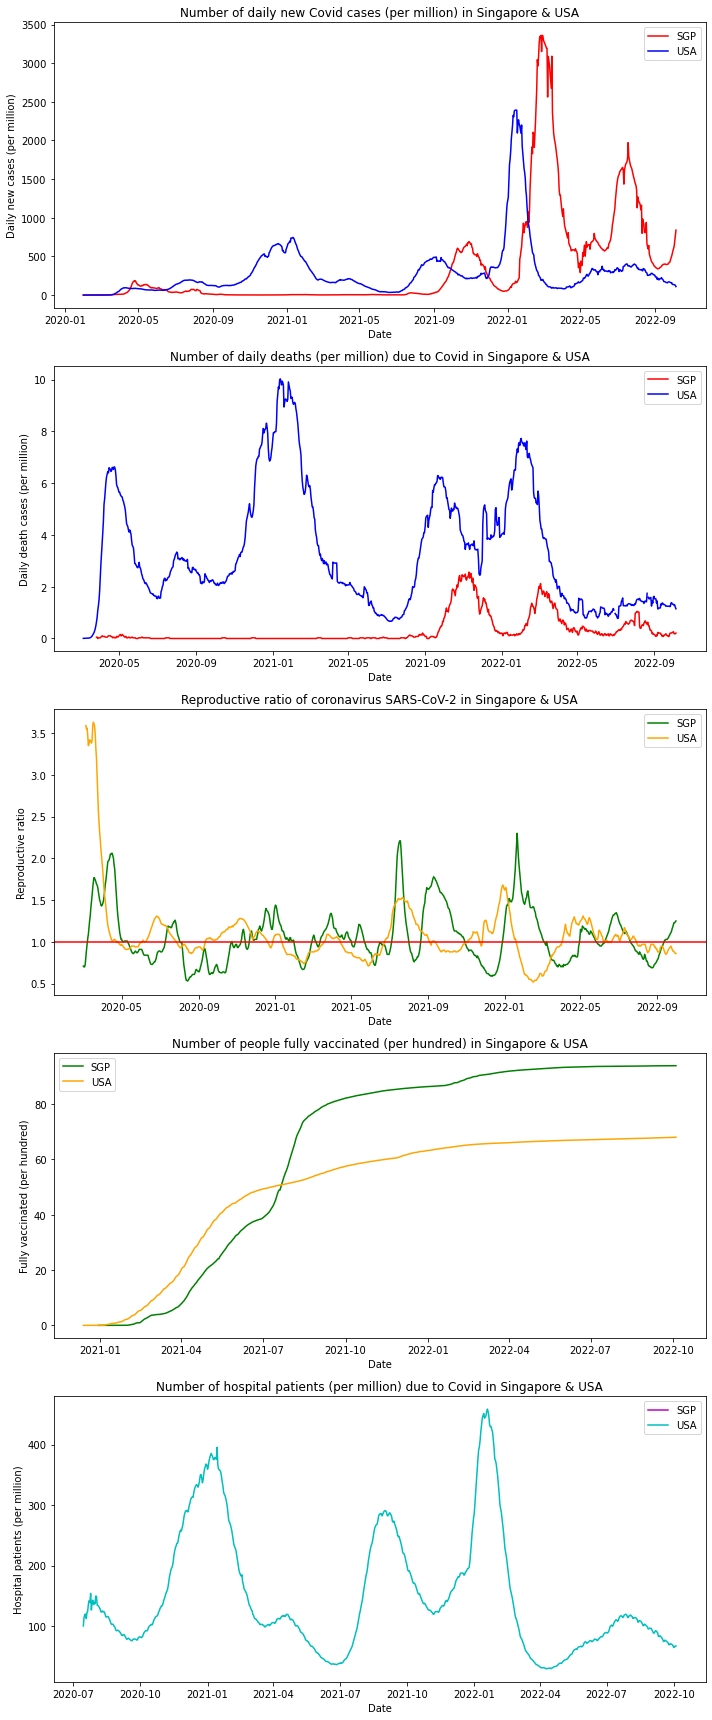

In [58]:
# Visualisation of two sets of Covid data (SGP & USA) for comparison

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Covid.csv')   # Return a dataframe from the csv file
df['date'] = pd.to_datetime(df['date'])   # Convert the 'Date' column data in dataframe into a Python date time object
display(df)

# Return Singapore & USA dataframes starting from 2020-01-31 
dfSG = df[(df['iso_code'] == 'SGP') & (df['date']>='2020-01-31')]
dfUS = df[(df['iso_code'] == 'USA') & (df['date']>='2020-01-31')]

# Convert dataframes to a numpy arrays
SG = pd.DataFrame(dfSG).to_numpy()
US = pd.DataFrame(dfUS).to_numpy()

# Plot COVID data
plt.figure(figsize=(10,24))
plt.subplot(5,1,1)
plt.plot(SG[:,3],SG[:,12],"r",label="SGP")   # 4th field is date; 13th field is daily new cases (smoothed) per million
plt.plot(US[:,3],US[:,12],"b",label="USA")
plt.title("Number of daily new Covid cases (per million) in Singapore & USA")
plt.ylabel("Daily new cases (per million)"); plt.xlabel("Date")
plt.legend()

plt.subplot(5,1,2)    
plt.plot(SG[:,3],SG[:,15],"r",label="SGP")   # 4th field is date; 16th field is daily deaths (smoothed) per million
plt.plot(US[:,3],US[:,15],"b",label="USA")
plt.title("Number of daily deaths (per million) due to Covid in Singapore & USA")
plt.ylabel("Daily death cases (per million)"); plt.xlabel("Date")
plt.legend()

plt.subplot(5,1,3)
plt.plot(SG[:,3],SG[:,16],"g",label="SGP")   # 4th field is date; 17th field is reproduction rate
plt.plot(US[:,3],US[:,16],"orange",label="USA")   
plt.axhline(y = 1.0,color='r')
plt.title("Reproductive ratio of coronavirus SARS-CoV-2 in Singapore & USA")
plt.ylabel("Reproductive ratio"); plt.xlabel("Date")
plt.legend()

plt.subplot(5,1,4)    
plt.plot(SG[:,3],SG[:,42],"g",label="SGP")   # 4th field is date; 43th field is number of fully vaccinated per hundred
plt.plot(US[:,3],US[:,42],"orange",label="USA")   
plt.title("Number of people fully vaccinated (per hundred) in Singapore & USA")
plt.ylabel("Fully vaccinated (per hundred)"); plt.xlabel("Date")
plt.legend()

plt.subplot(5,1,5)    
plt.plot(SG[:,3],SG[:,20],"m",label="SGP")   # 4th field is date; 21st field is number of hospital patients
plt.plot(US[:,3],US[:,20],"c",label="USA")   # per million; data for SG not available
plt.title("Number of hospital patients (per million) due to Covid in Singapore & USA")
plt.ylabel("Hospital patients (per million)"); plt.xlabel("Date")
plt.legend()

plt.tight_layout()
plt.show()

## References:
- [How Scientists Quantify the Intensity of an Outbreak](https://theconversation.com/r0-how-scientists-quantify-the-intensity-of-an-outbreak-like-coronavirus-and-predict-the-pandemics-spread-130777)
- [R0 versus Rt](https://www.channelnewsasia.com/singapore/covid-19-r-number-reproduction-new-cases-2181166)
- [WHO Updates on Covid-19](https://www.who.int/emergencies/diseases/novel-coronavirus-2019?adgroupsurvey={adgroupsurvey}&gclid=EAIaIQobChMI6dH169bN-gIVryErCh0APgMqEAAYAiAAEgJ_ivD_BwE)
- [Our World in Data](https://ourworldindata.org/)
- [The Pandas Dataframe](https://realpython.com/pandas-dataframe/)